# Machine Learning Engineer Nanodegree

## Project: Complaints Text Classification 

### 05. Model Evaluation

In the pre-last phase, in this notebook, of model training, I validate the possibility of analysing the various models using some refinement techniques.

Due to some technical limitations, already mentioned before, I chose to train the models on the data sets already pre-processed and cleaned, without applying parameters.

After validation, I selected two models: **Logistic Regression** model and **SVM Linear SVC model**, because it was the one that showed the best accuracy and performance, not the fastest in terms of processing, but in terms of accuracy and f1-score, it was the best.

So, in this phase of evaluation of the model, I'll choose to look in more detail at this model, and will try to make some kind of refinement in it.

Here, I'll understand the differences between predicted and real classified products, and also understand the reliability of the model.

At the end I'll save the trained model and the vectors used for the next deployment model phase. 

**Step 1 - Importing packages**

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import os
import re
import pickle

#Seed - https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/
seed = 90

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

# EDA
import sweetviz as sv
from pandas_profiling import ProfileReport as ppr

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Metrics to score classifiers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss

# Data splitting, CV
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold

# My libraries:
import utilities.helpers as helpers
import source_sklearn.train as train

# Warnings;
import warnings; warnings.simplefilter('ignore')


**Step 2 - Load Training and Model Validation**

In [2]:
#df_complaints_final
dest_folder = '../Capstone-Project/classification_data/';
df_complaints_final = helpers.load_pickle(dest_folder,'df_complaints_final');

# Load pickle file to a data frame
dest_folder = '../Capstone-Project/classification_data/';
# X_train 
file_name = 'X_train'
X_train = helpers.load_pickle(dest_folder,file_name);

# X_test 
file_name = 'X_test'
X_test = helpers.load_pickle(dest_folder,file_name);

# y_train 
file_name = 'y_train'
y_train = helpers.load_pickle(dest_folder,file_name);

# y_test 
file_name = 'y_test'
y_test = helpers.load_pickle(dest_folder,file_name);

# Features Train
train_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_1');

train_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_1');

train_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_1_clean');

train_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_1_clean');

train_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_2');

train_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_2');

train_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'train_tokenize_CountVectorizer_2_clean');

train_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'train_tokenize_TfidfVectorizer_2_clean');

# Features Test
test_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_1');

test_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_1');

test_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_1_clean');

test_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_1_clean');

test_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_2');

test_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_2');

test_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'test_tokenize_CountVectorizer_2_clean');

test_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'test_tokenize_TfidfVectorizer_2_clean');

# Features Model

word_vectorizer_tokenize_CountVectorizer_1 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_1');

word_vectorizer_tokenize_TfidfVectorizer_1 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_1');

word_vectorizer_tokenize_CountVectorizer_1_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_1_clean');

word_vectorizer_tokenize_TfidfVectorizer_1_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_1_clean');

word_vectorizer_tokenize_CountVectorizer_2 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_2');

word_vectorizer_tokenize_TfidfVectorizer_2 = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_2');

word_vectorizer_tokenize_CountVectorizer_2_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_CountVectorizer_2_clean');

word_vectorizer_tokenize_TfidfVectorizer_2_clean = helpers.load_pickle(dest_folder,'word_vectorizer_tokenize_TfidfVectorizer_2_clean');

#df_training_models_cv_scores_s1
df_training_models_cv_scores_s1 = helpers.load_pickle(dest_folder,'df_training_models_cv_scores_s1');


df_complaints_final pickle file loaded successfully!
X_train pickle file loaded successfully!
X_test pickle file loaded successfully!
y_train pickle file loaded successfully!
y_test pickle file loaded successfully!
train_tokenize_CountVectorizer_1 pickle file loaded successfully!
train_tokenize_TfidfVectorizer_1 pickle file loaded successfully!
train_tokenize_CountVectorizer_1_clean pickle file loaded successfully!
train_tokenize_TfidfVectorizer_1_clean pickle file loaded successfully!
train_tokenize_CountVectorizer_2 pickle file loaded successfully!
train_tokenize_TfidfVectorizer_2 pickle file loaded successfully!
train_tokenize_CountVectorizer_2_clean pickle file loaded successfully!
train_tokenize_TfidfVectorizer_2_clean pickle file loaded successfully!
test_tokenize_CountVectorizer_1 pickle file loaded successfully!
test_tokenize_TfidfVectorizer_1 pickle file loaded successfully!
test_tokenize_CountVectorizer_1_clean pickle file loaded successfully!
test_tokenize_TfidfVectorizer_1_

In [7]:
# Products 
file_name = 'products'
products = helpers.load_pickle(dest_folder,file_name);

# Pre Feature 
file_name = 'pre_features'
pre_features = helpers.load_pickle(dest_folder,file_name);

products pickle file loaded successfully!
pre_features pickle file loaded successfully!


**Step 3 - Model performance analysis**


In [3]:
res = df_training_models_cv_scores_s1.groupby(['model_desc'], as_index=False)['accuracy'].mean()
res.sort_values(by=['accuracy'], ascending=False)

,model_desc,accuracy
3,LinearSVC,0.838597
4,LogisticRegression,0.837103
5,MultinomialNB,0.733771
6,MultinomialNB_prior,0.733771
0,DecisionTreeClassifier,0.720333
7,RandomForestClassifier,0.506798
8,RandomForestClassifier_200,0.501415
2,KNeighborsClassifier,0.483930
1,GaussianNB,0.403897


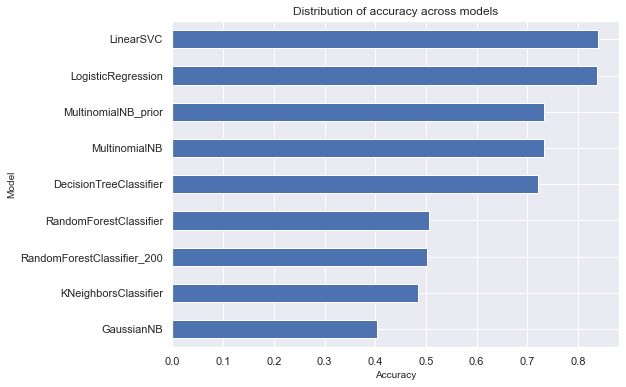

In [4]:
# Top training model
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1)
df_training_models_cv_scores_s1.groupby('model_desc').accuracy.mean().sort_values().plot.barh(ylim=0, title='Distribution of accuracy across models');
plt.xlabel('Accuracy', fontsize = 10);
plt.ylabel('Model', fontsize = 10);
plt.show();

In [5]:
res_2 = df_training_models_cv_scores_s1.groupby(['model_desc', 'simulation'], as_index=False)['accuracy'].mean()
res_2 = res_2.sort_values(by=['accuracy'], ascending=False)
res_2.head(5)

,model_desc,simulation,accuracy
19,LinearSVC,CountVectorizer-2-NotClean,0.844417
18,LinearSVC,CountVectorizer-2-Clean,0.842354
27,LogisticRegression,TfidfVectorizer-1-NotClean,0.840489
26,LogisticRegression,TfidfVectorizer-1-Clean,0.840052
21,LinearSVC,TfidfVectorizer-1-NotClean,0.838187




**Step 4 - Model chosen analysis**



The proposed models were trained and based on the above statistics, the two best ones were identified and chosen for evaluation: SVM Linear SVC and Logistic Regression. Precision metrica was the metrica used to choose these two models.

Below, a report was generated with the statistics obtained by model.

------------------------------
------------------------------
# Model: LogisticRegression
LogisticRegression Model Accuracy Score 84.8754166005396
------------------------------
------------------------------
# Classification Report
                                                    precision    recall  f1-score   support

                           Bank account or service       0.70      0.08      0.14        89
                       Checking or savings account       0.52      0.25      0.34       156
                       Credit card or prepaid card       0.74      0.67      0.70       390
                Credit reporting, repair, or other       0.85      0.90      0.87      1490
                                   Debt collection       0.81      0.79      0.80       755
                                              Loan       0.77      0.67      0.72       345
Money transfer, virtual currency, or money service       0.88      0.96      0.92      2594
                              

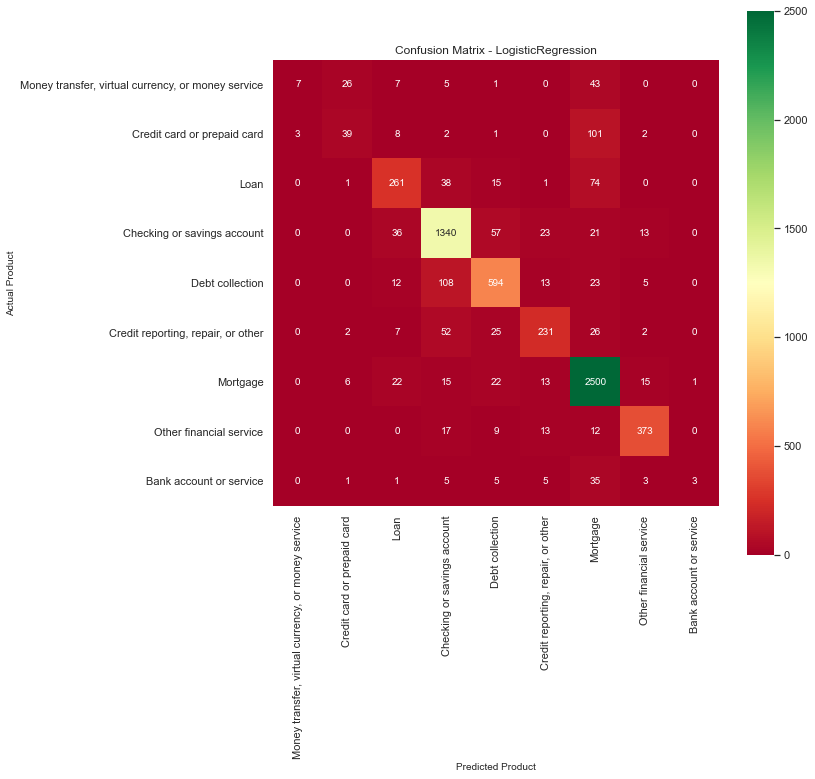

------------------------------
------------------------------
------------------------------
------------------------------
# Model: LinearSVC
LinearSVC Model Accuracy Score 84.09776225995874
------------------------------
------------------------------
# Classification Report
                                                    precision    recall  f1-score   support

                           Bank account or service       0.47      0.18      0.26        89
                       Checking or savings account       0.49      0.28      0.36       156
                       Credit card or prepaid card       0.71      0.68      0.70       390
                Credit reporting, repair, or other       0.84      0.88      0.86      1490
                                   Debt collection       0.80      0.78      0.79       755
                                              Loan       0.74      0.65      0.69       345
Money transfer, virtual currency, or money service       0.90      0.95      

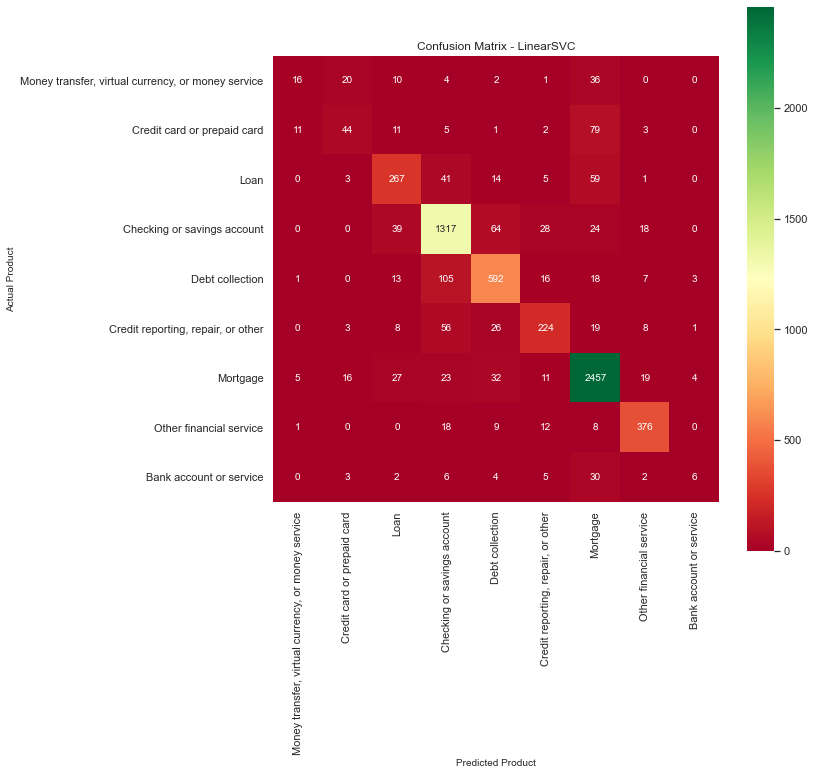

------------------------------
------------------------------


In [10]:
# Classification Report
p = products.drop_duplicates()
p = p.copy()

models = [
        ('LogisticRegression', LogisticRegression(random_state=seed)),
        ('LinearSVC', LinearSVC())
        ]
names = []
for name, model in models:
    model = model.fit(train_tokenize_TfidfVectorizer_1_clean, y_train)
    y_pred = model.predict(test_tokenize_TfidfVectorizer_1_clean)
    print("-"*30)
    print("-"*30)
    print("# Model: " + name)
    print(name + ' Model Accuracy Score', accuracy_score(y_test,y_pred)*100)
    print("-"*30)
    print("-"*30)
    print('# Classification Report')
    print(classification_report(y_test, y_pred))
    print("-"*30)
    print("-"*30)
    print('Confusion Matrix for ' + name)
    #print(confusion_matrix(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, annot_kws={"size":10}, cmap="RdYlGn", square=True, fmt='d',
                xticklabels= p.values, yticklabels= p.values)
    plt.ylabel('Actual Product', fontsize = 10)
    plt.xlabel('Predicted Product', fontsize = 10)
    plt.title('Confusion Matrix - '+ name)
    plt.show()
    print("-"*30)
    print("-"*30)
    #plot_precision_recall_curve(model, y_test, y_pred)
    #plt.title('Precision-Recall Curve - '+ name)
    #plt.show()



**Step 5 - Validate chosen models** 

After selecting the two best models, I will try to make some tests of the model to see if the behavior is what is expected.

I will create the models and the predictor, to 
make the necessary tests.

After the tests I will save the model to use in the app.


**Logistic Regression Model**

In [19]:
# Initializing our chosen logreg model
LogisticRegression = LogisticRegression(random_state=seed)

# Fitting our model
LogisticRegression_fit = LogisticRegression.fit(train_tokenize_TfidfVectorizer_1_clean, y_train)

# Obtaining prediction
y_prediction_LogisticRegression = LogisticRegression_fit.predict(test_tokenize_TfidfVectorizer_1_clean)

print('Logistic Regression Model Accuracy Score', accuracy_score(y_test, y_prediction_LogisticRegression)*100)

Logistic Regression Model Accuracy Score 84.8754166005396


**Example 1**

In [21]:
# Create at a sample text
complaint_text = list(df_complaints_final.complaint_text[:3])[2]

# Converting to a list for TfidfVectorizer to use
list_sample_complaint_text = []
list_sample_complaint_text.append(complaint_text)
list_sample_complaint_text 

print(list_sample_complaint_text)
print(LogisticRegression_fit.predict(word_vectorizer_tokenize_TfidfVectorizer_1_clean.transform(list_sample_complaint_text)))

["On XX/XX/XXXX/2016, I was excited to go in and look at motorcycles. I entered XXXX XXXX XXXX XXXX XXXX in XXXX FL. Prior to this i looked at inventory online and saw what I wanted and didn't want anything else but this XXXX XXXX XXXX sports bike. I sat with one of the sales guys and he told me I was approved and that my loan would be for 2 years. I was so excited about this I was not even thinking, i was signing away paperwork. The bike in the dealer was in the amount of {$5900.00} with dealer fee and tag title, came out to XXXX. I gave a down payment of XXXX. I have had my bike for 2 years and I am still making payments on this bike. I asked the place Cycleone Financial,  where i send my payments when i look at my documents they had me sign a Lease document on a used bike that had 32,000 miles on it, on the paperwork it states it had 18,500 and that is wrong. When i am finish paying this bike it would total {$14000.00}. If i would have known this i would have not bothered to take th

**Example 2**

In [28]:
print(LogisticRegression_fit.predict(word_vectorizer_tokenize_TfidfVectorizer_1_clean.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


**SVM Linear SVC Model**

In [22]:
# Initializing our chosen logreg model
LinearSVC = LinearSVC(random_state=seed)

# Fitting our model
LinearSVC_fit = LinearSVC.fit(train_tokenize_TfidfVectorizer_1_clean, y_train)

# Obtaining prediction
y_prediction_LinearSVC = LinearSVC.predict(test_tokenize_TfidfVectorizer_1_clean)

print('Linear SVC Model Accuracy Score', accuracy_score(y_test, y_prediction_LinearSVC)*100)

Linear SVC Model Accuracy Score 84.09776225995874


**Example 1**

In [23]:
print(list_sample_complaint_text)
print(LinearSVC_fit.predict(word_vectorizer_tokenize_TfidfVectorizer_1_clean.transform(list_sample_complaint_text)))

["On XX/XX/XXXX/2016, I was excited to go in and look at motorcycles. I entered XXXX XXXX XXXX XXXX XXXX in XXXX FL. Prior to this i looked at inventory online and saw what I wanted and didn't want anything else but this XXXX XXXX XXXX sports bike. I sat with one of the sales guys and he told me I was approved and that my loan would be for 2 years. I was so excited about this I was not even thinking, i was signing away paperwork. The bike in the dealer was in the amount of {$5900.00} with dealer fee and tag title, came out to XXXX. I gave a down payment of XXXX. I have had my bike for 2 years and I am still making payments on this bike. I asked the place Cycleone Financial,  where i send my payments when i look at my documents they had me sign a Lease document on a used bike that had 32,000 miles on it, on the paperwork it states it had 18,500 and that is wrong. When i am finish paying this bike it would total {$14000.00}. If i would have known this i would have not bothered to take th

**Example 2**

In [30]:
print(LinearSVC_fit.predict(word_vectorizer_tokenize_TfidfVectorizer_1_clean.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


After some tests it turns out that some of the complaints are poorly classified because they address more than one particular issue. 
Or one can also verify that new complaints that have nothing to do with the financial subject are classified to products that have nothing to do with it.

Regarding the former, these are errors that will normally happen (a complaint can say debit card and loans and is classified for one of them).
Regarding the second problem, I can advance that in future work a product can be created ("Others") where these complaints can "enter".


**Step 6 - Refinement and training Model**

Due to the performance challenge of my machine, during the implementation of the models several tests and simulations were carried out, leading to the refinement of the models according to the needs.
New models were defined to train the data set, variations of the models already selected with the use of different parameters and some models were also removed due to performance problems in their execution:

Unbalanced Classes: I have chosen to consolidate the products in other products classes.

Bag of Words: To create the bag of words, I considered TfidfVectorizer and CountVectorizer. Some models performed better than others, but in the end, I chose the simulations that used the TfidfVectorizer. In this case, TFIDF will be used to assess the importance of a word for a complaint in a complaints collection.

Cleaning of the narratives: I considered carrying out the cleaning of the narratives to apply the TfidfVectorizer and the CountVectorizer. Following this, eight pre-processed data subsets were created to test the model’s performance.

Parameters: A number of parameters were set as the simulations were carried out. I used cross validate to analyze the accuracy and the remaining macro metrics (in weighted and average terms). 
In the end, due to performance problems, I chose not to apply several changes in the parameters, in order to have a good classifier that could be used in the evaluation phase.



**Step 7 - Validate refined model**

After training the various models, and the various simulations, I validated the results using the generated output. The table below represents the global average of accuracy per trained models. 

In my particular case, compared to the other models (using logistic regression), which I implemented in real situations, for a multi-class problem, for the classification of text collected through surveys, in several languages (languages including Russian, Bulgarian, Romanian, Portuguese, English, Polish, Ukrainian and Kazakhstan) with an accuracy of 75%, I can assume that during the evaluation of the metrics, the two models defined here have a better performance.


**Step 8 - Save predict model to deploy Validate**

In [31]:
# 1. Pickling our subsetted dataframe
dest_folder = '../Capstone-Project/app/models/';
file_name = 'word_vectorizer_tokenize_TfidfVectorizer_1_clean'
helpers.save_pickle(dest_folder, word_vectorizer_tokenize_TfidfVectorizer_1_clean, file_name);

# Models
file_name = 'LinearSVC'
helpers.save_pickle(dest_folder, LinearSVC, file_name);

file_name = 'LogisticRegression'
helpers.save_pickle(dest_folder, LogisticRegression, file_name);

## Up Next

This notebook is just about model evaluation. 

In the next few notebooks, I'll use this data to train a complete complaint classifier.  

For that I'll use the sixth and last notebook **06_deployment_model**.

-------------------------------------- END 05 Model Evaluation --------------------------------------